In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
#!pip install pandas pyarrow
import pyarrow

import glob

import pyarrow.parquet as pq

#files = glob.glob('../data/raw/*.parquet.gzip')
#movies = pd.concat([pq.read_table(fp).to_pandas() for fp in files])
movies = pq.read_table(source="../data/raw/df.parquet.gzip").to_pandas()
movies


In /home/ths/miniconda3/envs/aida/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ths/miniconda3/envs/aida/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ths/miniconda3/envs/aida/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ths/miniconda3/envs/aida/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ths/miniconda3/envs

,adult,id,original_title,popularity,video,url,poster_url,genre_id,poster_exists
380000,False,537245,El Pescador,0.600,False,https://www.themoviedb.org/movie/537245,https://www.themoviedb.org/t/p/w500//pOOabahFF...,[],True
380001,False,537246,Der Herzog von Aleria,0.600,False,https://www.themoviedb.org/movie/537246,None,[18],False
380002,False,537247,Wem nie durch Liebe Leid geschah!,0.600,False,https://www.themoviedb.org/movie/537247,None,[18],False
380003,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,"[80, 18]",True
380004,False,537251,民暴の帝王,0.600,False,https://www.themoviedb.org/movie/537251,https://www.themoviedb.org/t/p/w500//5ayhYaAfg...,[],True
...,...,...,...,...,...,...,...,...,...
19995,False,31791,Opeth: The Roundhouse Tapes,5.698,True,https://www.themoviedb.org/movie/31791,https://www.themoviedb.org/t/p/w500//YaCzP9wPJ...,[10402],True
19996,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,[10402],True
19997,False,31793,"Rob Zombie: Past, Present & Future",2.570,False,https://www.themoviedb.org/movie/31793,None,[10402],False
19998,False,31794,Rotting Christ: In Domine Sathana,0.600,False,https://www.themoviedb.org/movie/31794,None,"[28, 10402]",False


In [2]:
### Check null values

movies.isnull().sum()

# there are movies without gender 
movies = movies.drop(movies[movies['genre_id']=='[]'].index)

# drop movies with not available posters
movies = movies.drop(movies[movies['poster_exists']==False].index)

movies[movies['genre_id']=='[]']

# The list is a list of integers  , reason why a I made this function .

map_gender={"28":"Action",
"12":"Adventure",
"16":"Animation",
"35":"Comedy",
"80":"Crime",
"99":"Documentary",
"18":"Drama",
"10751":"Family",
"14":"Fantasy",
"36":	"History",
"27":"Horror",
"10402"	:"Music",
"9648":"Mystery",
"10749":"Romance",
"878"	:"Science Fiction",
"10770":"TV Movie",
"53":"Thriller",
"10752":"War",
"37":"Western" }

def map_multiclass(x):
  
  tmp=[]  
  

  for y in x.split(","):
   
    y=y.replace('[', '') 
    y=y.replace(']', '') 
    y=y.replace(' ', '') 
 
    if y in map_gender:
     tmp.append(map_gender[y])
 


  return [','.join(tmp)]


movies['genre_ids2']=movies['genre_id'].apply(lambda x: map_multiclass(x))


movies













,adult,id,original_title,popularity,video,url,poster_url,genre_id,poster_exists,genre_ids2
380003,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,"[80, 18]",True,"[Crime,Drama]"
380010,False,537266,Success,0.600,False,https://www.themoviedb.org/movie/537266,https://www.themoviedb.org/t/p/w500//tJMm1JJUe...,[18],True,[Drama]
380017,False,537274,Предел возможного,0.620,False,https://www.themoviedb.org/movie/537274,https://www.themoviedb.org/t/p/w500//h9aXCUZ6g...,[18],True,[Drama]
380020,False,537277,母親,0.600,False,https://www.themoviedb.org/movie/537277,https://www.themoviedb.org/t/p/w500//3Ogn8SWj2...,[18],True,[Drama]
380022,False,537281,1+1=3 Ora Tinjon,0.600,False,https://www.themoviedb.org/movie/537281,https://www.themoviedb.org/t/p/w500//47yYJPL2q...,[18],True,[Drama]
...,...,...,...,...,...,...,...,...,...,...
19993,False,31788,"Bill Hicks Live: Satirist, Social Critic, Stan...",5.355,False,https://www.themoviedb.org/movie/31788,https://www.themoviedb.org/t/p/w500//lz2poVfHS...,[35],True,[Comedy]
19994,False,31789,Pédale douce,6.775,False,https://www.themoviedb.org/movie/31789,https://www.themoviedb.org/t/p/w500//xYFrGGsmK...,[35],True,[Comedy]
19995,False,31791,Opeth: The Roundhouse Tapes,5.698,True,https://www.themoviedb.org/movie/31791,https://www.themoviedb.org/t/p/w500//YaCzP9wPJ...,[10402],True,[Music]
19996,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,[10402],True,[Music]


In [3]:

movies = movies.drop(movies[movies['poster_url'].isnull()].index)
movies

,adult,id,original_title,popularity,video,url,poster_url,genre_id,poster_exists,genre_ids2
380003,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,"[80, 18]",True,"[Crime,Drama]"
380010,False,537266,Success,0.600,False,https://www.themoviedb.org/movie/537266,https://www.themoviedb.org/t/p/w500//tJMm1JJUe...,[18],True,[Drama]
380017,False,537274,Предел возможного,0.620,False,https://www.themoviedb.org/movie/537274,https://www.themoviedb.org/t/p/w500//h9aXCUZ6g...,[18],True,[Drama]
380020,False,537277,母親,0.600,False,https://www.themoviedb.org/movie/537277,https://www.themoviedb.org/t/p/w500//3Ogn8SWj2...,[18],True,[Drama]
380022,False,537281,1+1=3 Ora Tinjon,0.600,False,https://www.themoviedb.org/movie/537281,https://www.themoviedb.org/t/p/w500//47yYJPL2q...,[18],True,[Drama]
...,...,...,...,...,...,...,...,...,...,...
19993,False,31788,"Bill Hicks Live: Satirist, Social Critic, Stan...",5.355,False,https://www.themoviedb.org/movie/31788,https://www.themoviedb.org/t/p/w500//lz2poVfHS...,[35],True,[Comedy]
19994,False,31789,Pédale douce,6.775,False,https://www.themoviedb.org/movie/31789,https://www.themoviedb.org/t/p/w500//xYFrGGsmK...,[35],True,[Comedy]
19995,False,31791,Opeth: The Roundhouse Tapes,5.698,True,https://www.themoviedb.org/movie/31791,https://www.themoviedb.org/t/p/w500//YaCzP9wPJ...,[10402],True,[Music]
19996,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,[10402],True,[Music]


<AxesSubplot:xlabel='Multiclass'>

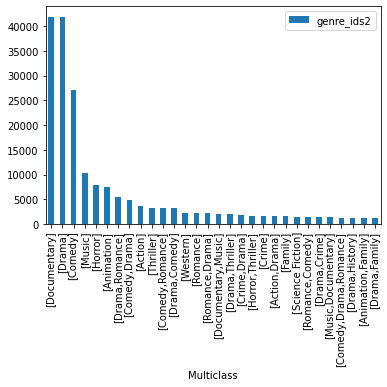

In [4]:

## Dist of genders

## Toop 30 multiclasses

top30=pd.DataFrame(movies.genre_ids2.value_counts().sort_values(ascending=False)[0:30]).reset_index().rename(columns={'index': 'Multiclass'})

top30.plot.bar( x='Multiclass', y='genre_ids2')


In [5]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb= MultiLabelBinarizer()
labeled=pd.DataFrame(mlb.fit_transform(movies['genre_ids2']),columns=mlb.classes_)
movies.reset_index(drop=True, inplace=True)
movies_multilabel=pd.concat([movies,labeled],axis=1)
movies_multilabel

,adult,id,original_title,popularity,video,url,poster_url,genre_id,poster_exists,genre_ids2,...,"Western,Thriller","Western,Thriller,Action","Western,Thriller,Drama","Western,Thriller,Horror","Western,Thriller,TV Movie","Western,War","Western,War,Action","Western,War,Adventure,History,Science Fiction,Animation","Western,War,Drama,Music","Western,War,History,Romance"
0,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,"[80, 18]",True,"[Crime,Drama]",...,0,0,0,0,0,0,0,0,0,0
1,False,537266,Success,0.600,False,https://www.themoviedb.org/movie/537266,https://www.themoviedb.org/t/p/w500//tJMm1JJUe...,[18],True,[Drama],...,0,0,0,0,0,0,0,0,0,0
2,False,537274,Предел возможного,0.620,False,https://www.themoviedb.org/movie/537274,https://www.themoviedb.org/t/p/w500//h9aXCUZ6g...,[18],True,[Drama],...,0,0,0,0,0,0,0,0,0,0
3,False,537277,母親,0.600,False,https://www.themoviedb.org/movie/537277,https://www.themoviedb.org/t/p/w500//3Ogn8SWj2...,[18],True,[Drama],...,0,0,0,0,0,0,0,0,0,0
4,False,537281,1+1=3 Ora Tinjon,0.600,False,https://www.themoviedb.org/movie/537281,https://www.themoviedb.org/t/p/w500//47yYJPL2q...,[18],True,[Drama],...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281536,False,31788,"Bill Hicks Live: Satirist, Social Critic, Stan...",5.355,False,https://www.themoviedb.org/movie/31788,https://www.themoviedb.org/t/p/w500//lz2poVfHS...,[35],True,[Comedy],...,0,0,0,0,0,0,0,0,0,0
281537,False,31789,Pédale douce,6.775,False,https://www.themoviedb.org/movie/31789,https://www.themoviedb.org/t/p/w500//xYFrGGsmK...,[35],True,[Comedy],...,0,0,0,0,0,0,0,0,0,0
281538,False,31791,Opeth: The Roundhouse Tapes,5.698,True,https://www.themoviedb.org/movie/31791,https://www.themoviedb.org/t/p/w500//YaCzP9wPJ...,[10402],True,[Music],...,0,0,0,0,0,0,0,0,0,0
281539,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,[10402],True,[Music],...,0,0,0,0,0,0,0,0,0,0


In [6]:
movies_multilabel.isnull().sum()

adult                                                      0
id                                                         0
original_title                                             0
popularity                                                 0
video                                                      0
                                                          ..
Western,War                                                0
Western,War,Action                                         0
Western,War,Adventure,History,Science Fiction,Animation    0
Western,War,Drama,Music                                    0
Western,War,History,Romance                                0
Length: 9152, dtype: int64

In [7]:
movies_multilabel.genre_ids2.nunique

<bound method IndexOpsMixin.nunique of 0         [Crime,Drama]
1               [Drama]
2               [Drama]
3               [Drama]
4               [Drama]
              ...      
281536         [Comedy]
281537         [Comedy]
281538          [Music]
281539          [Music]
281540          [Music]
Name: genre_ids2, Length: 281541, dtype: object>

In [8]:
movies_multilabel.to_parquet("../data/interim/df_multilabel.parquet.gzip", compression='gzip')


In [9]:
#################################################################################  
#################################################################################  
############################ DATA FRAME SAMPLE #####################################
#################################################################################  
#################################################################################  

In [10]:
## Review gender name  Explode the gender list in x rows to make a class and not multiclass

#movies= pd.read_csv('movies - movies.csv')

movies_classes = pq.read_table(source="../data/raw/df.parquet.gzip").to_pandas()
movies_classes


movies_classes['genre_id'] = movies_classes['genre_id'].apply(literal_eval) #convert to list type type was extrange in the excel
movie_gender=movies_classes.explode('genre_id')

movie_gender[movie_gender.original_title=='Submarine D-1']

# the movie is x times depend on the gender 


,adult,id,original_title,popularity,video,url,poster_url,genre_id,poster_exists
99995,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,28,True
99995,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,18,True


In [11]:
movie_gender

,adult,id,original_title,popularity,video,url,poster_url,genre_id,poster_exists
380000,False,537245,El Pescador,0.600,False,https://www.themoviedb.org/movie/537245,https://www.themoviedb.org/t/p/w500//pOOabahFF...,NaN,True
380001,False,537246,Der Herzog von Aleria,0.600,False,https://www.themoviedb.org/movie/537246,None,18,False
380002,False,537247,Wem nie durch Liebe Leid geschah!,0.600,False,https://www.themoviedb.org/movie/537247,None,18,False
380003,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,80,True
380003,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,18,True
...,...,...,...,...,...,...,...,...,...
19996,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,10402,True
19997,False,31793,"Rob Zombie: Past, Present & Future",2.570,False,https://www.themoviedb.org/movie/31793,None,10402,False
19998,False,31794,Rotting Christ: In Domine Sathana,0.600,False,https://www.themoviedb.org/movie/31794,None,28,False
19998,False,31794,Rotting Christ: In Domine Sathana,0.600,False,https://www.themoviedb.org/movie/31794,None,10402,False


In [12]:

## merge both datasets

gender_list= pd.read_csv('../data/raw/movie_genres - movie_genres.csv')

gender_list=gender_list.rename(columns={"id":"genre_id"})

movie_gender_name=pd.merge(movie_gender,gender_list,left_on='genre_id', right_on='genre_id' ,how="left" )
movie_gender_name[movie_gender_name.original_title=='Submarine D-1']



,adult,id,original_title,popularity,video,url,poster_url,genre_id,poster_exists,name
337651,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,28,True,Action
337652,False,162785,Submarine D-1,2.423,False,https://www.themoviedb.org/movie/162785,https://www.themoviedb.org/t/p/w500//wv6J5QCTo...,18,True,Drama


In [13]:
movie_gender_name

,adult,id,original_title,popularity,video,url,poster_url,genre_id,poster_exists,name
0,False,537245,El Pescador,0.600,False,https://www.themoviedb.org/movie/537245,https://www.themoviedb.org/t/p/w500//pOOabahFF...,NaN,True,NaN
1,False,537246,Der Herzog von Aleria,0.600,False,https://www.themoviedb.org/movie/537246,None,18,False,Drama
2,False,537247,Wem nie durch Liebe Leid geschah!,0.600,False,https://www.themoviedb.org/movie/537247,None,18,False,Drama
3,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,80,True,Crime
4,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,18,True,Drama
...,...,...,...,...,...,...,...,...,...,...
813263,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,10402,True,Music
813264,False,31793,"Rob Zombie: Past, Present & Future",2.570,False,https://www.themoviedb.org/movie/31793,None,10402,False,Music
813265,False,31794,Rotting Christ: In Domine Sathana,0.600,False,https://www.themoviedb.org/movie/31794,None,28,False,Action
813266,False,31794,Rotting Christ: In Domine Sathana,0.600,False,https://www.themoviedb.org/movie/31794,None,10402,False,Music


In [14]:

## Check nulls  note poster can have null values but not the gender
movie_gender_name = movie_gender_name.drop(movie_gender_name[movie_gender_name['poster_url'].isnull()].index)
movie_gender_name
movie_gender_name=movie_gender_name.dropna()
movie_gender_name.isnull().sum()



adult             0
id                0
original_title    0
popularity        0
video             0
url               0
poster_url        0
genre_id          0
poster_exists     0
name              0
dtype: int64

In [15]:
movie_gender_name.head(5)

,adult,id,original_title,popularity,video,url,poster_url,genre_id,poster_exists,name
3,False,537250,¿Por qué ya no me quieres?,1.40,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,80,True,Crime
4,False,537250,¿Por qué ya no me quieres?,1.40,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,18,True,Drama
11,False,537266,Success,0.60,False,https://www.themoviedb.org/movie/537266,https://www.themoviedb.org/t/p/w500//tJMm1JJUe...,18,True,Drama
18,False,537274,Предел возможного,0.62,False,https://www.themoviedb.org/movie/537274,https://www.themoviedb.org/t/p/w500//h9aXCUZ6g...,18,True,Drama
21,False,537277,母親,0.60,False,https://www.themoviedb.org/movie/537277,https://www.themoviedb.org/t/p/w500//3Ogn8SWj2...,18,True,Drama


In [16]:
top30_separateClass=pd.DataFrame(movie_gender_name.name.value_counts()).reset_index().rename(columns={'index': 'class_'})
top30_separateClass

,class_,name
0,Drama,97991
1,Comedy,64549
2,Documentary,50366
3,Romance,25851
4,Action,23948
5,Thriller,23580
6,Horror,21383
7,Music,19729
8,Animation,18575
9,Crime,16629


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

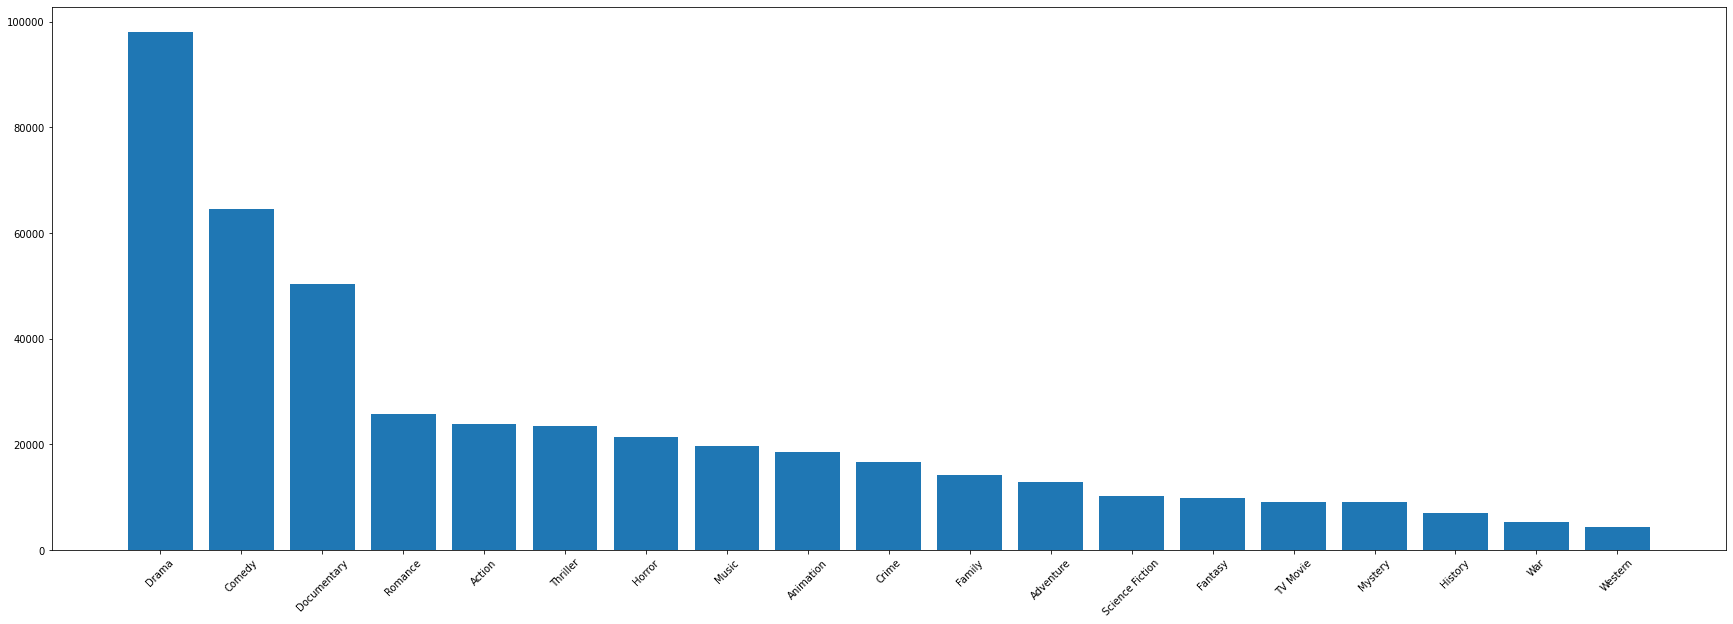

In [17]:
plt.figure(figsize=(30,10)) 
plt.bar(top30_separateClass.class_,top30_separateClass.name)
plt.xticks(rotation=45) 

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(sparse=False, handle_unknown="ignore").fit(movie_gender_name[['name']])
ohe_class=pd.DataFrame(ohe.transform(movie_gender_name[['name']]),columns=ohe.get_feature_names())
movie_gender_name.reset_index(drop=True, inplace=True)
movies_class = pd.concat([movie_gender_name, ohe_class], axis=1)
movies_class



,adult,id,original_title,popularity,video,url,poster_url,genre_id,poster_exists,name,...,x0_History,x0_Horror,x0_Music,x0_Mystery,x0_Romance,x0_Science Fiction,x0_TV Movie,x0_Thriller,x0_War,x0_Western
0,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,80,True,Crime,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,537250,¿Por qué ya no me quieres?,1.400,False,https://www.themoviedb.org/movie/537250,https://www.themoviedb.org/t/p/w500//8Y0aOxqSe...,18,True,Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,537266,Success,0.600,False,https://www.themoviedb.org/movie/537266,https://www.themoviedb.org/t/p/w500//tJMm1JJUe...,18,True,Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,537274,Предел возможного,0.620,False,https://www.themoviedb.org/movie/537274,https://www.themoviedb.org/t/p/w500//h9aXCUZ6g...,18,True,Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,537277,母親,0.600,False,https://www.themoviedb.org/movie/537277,https://www.themoviedb.org/t/p/w500//3Ogn8SWj2...,18,True,Drama,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444520,False,31788,"Bill Hicks Live: Satirist, Social Critic, Stan...",5.355,False,https://www.themoviedb.org/movie/31788,https://www.themoviedb.org/t/p/w500//lz2poVfHS...,35,True,Comedy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444521,False,31789,Pédale douce,6.775,False,https://www.themoviedb.org/movie/31789,https://www.themoviedb.org/t/p/w500//xYFrGGsmK...,35,True,Comedy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444522,False,31791,Opeth: The Roundhouse Tapes,5.698,True,https://www.themoviedb.org/movie/31791,https://www.themoviedb.org/t/p/w500//YaCzP9wPJ...,10402,True,Music,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
444523,False,31792,Ozzy Osbourne: Bark at the Moon,3.115,False,https://www.themoviedb.org/movie/31792,https://www.themoviedb.org/t/p/w500//vG0QdyICu...,10402,True,Music,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
movies_class.isnull().sum()

adult                 0
id                    0
original_title        0
popularity            0
video                 0
url                   0
poster_url            0
genre_id              0
poster_exists         0
name                  0
x0_Action             0
x0_Adventure          0
x0_Animation          0
x0_Comedy             0
x0_Crime              0
x0_Documentary        0
x0_Drama              0
x0_Family             0
x0_Fantasy            0
x0_History            0
x0_Horror             0
x0_Music              0
x0_Mystery            0
x0_Romance            0
x0_Science Fiction    0
x0_TV Movie           0
x0_Thriller           0
x0_War                0
x0_Western            0
dtype: int64

In [20]:

movies_class.to_parquet("../data/interim/df_label_correct_exploded.gzip", compression='gzip')

In [21]:
tmp=pd.read_parquet("../data/interim/df_label_correct_exploded.gzip")





In [22]:
tmp['name'].unique
genre_col=['x0_Action', 'x0_Adventure',
       'x0_Animation', 'x0_Comedy', 'x0_Crime', 'x0_Documentary', 'x0_Drama',
       'x0_Family', 'x0_Fantasy', 'x0_History', 'x0_Horror', 'x0_Music',
       'x0_Mystery', 'x0_Romance', 'x0_Science Fiction', 'x0_TV Movie',
       'x0_Thriller', 'x0_War', 'x0_Western' ]

       

In [23]:
buckets=[]
for x in genre_col:
  buckets.append(tmp[tmp[x]==1].sample(1000, random_state=42 ))


In [24]:
samples_df=pd.concat(buckets)



In [25]:
samples_df.head(4)

,adult,id,original_title,popularity,video,url,poster_url,genre_id,poster_exists,name,...,x0_History,x0_Horror,x0_Music,x0_Mystery,x0_Romance,x0_Science Fiction,x0_TV Movie,x0_Thriller,x0_War,x0_Western
173894,False,110155,T-O: Triángulo de oro - 'La isla fantasma',0.600,False,https://www.themoviedb.org/movie/110155,https://www.themoviedb.org/t/p/w500//f55BOgrfZ...,28,True,Action,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73806,False,686388,Răzbunarea,0.630,False,https://www.themoviedb.org/movie/686388,https://www.themoviedb.org/t/p/w500//hA8BF6uvx...,28,True,Action,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319178,False,206868,Strongheart,0.938,False,https://www.themoviedb.org/movie/206868,https://www.themoviedb.org/t/p/w500//anKywJHJy...,28,True,Action,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290906,False,359505,പതാക,0.600,False,https://www.themoviedb.org/movie/359505,https://www.themoviedb.org/t/p/w500//9pEiRnlD7...,28,True,Action,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
b1=samples_df[['id']+genre_col].groupby("id").sum()

In [27]:

b1

,x0_Action,x0_Adventure,x0_Animation,x0_Comedy,x0_Crime,x0_Documentary,x0_Drama,x0_Family,x0_Fantasy,x0_History,x0_Horror,x0_Music,x0_Mystery,x0_Romance,x0_Science Fiction,x0_TV Movie,x0_Thriller,x0_War,x0_Western
id,,,,,,,,,,,,,,,,,,,
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
803926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
803948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
b2= samples_df[[ "adult",	"id","original_title","popularity",	"video"	,"url"	,"poster_url"]].groupby("id").head(1)

In [29]:
b2

,adult,id,original_title,popularity,video,url,poster_url
173894,False,110155,T-O: Triángulo de oro - 'La isla fantasma',0.600,False,https://www.themoviedb.org/movie/110155,https://www.themoviedb.org/t/p/w500//f55BOgrfZ...
73806,False,686388,Răzbunarea,0.630,False,https://www.themoviedb.org/movie/686388,https://www.themoviedb.org/t/p/w500//hA8BF6uvx...
319178,False,206868,Strongheart,0.938,False,https://www.themoviedb.org/movie/206868,https://www.themoviedb.org/t/p/w500//anKywJHJy...
290906,False,359505,പതാക,0.600,False,https://www.themoviedb.org/movie/359505,https://www.themoviedb.org/t/p/w500//9pEiRnlD7...
208566,False,88183,High-Ballin',2.549,False,https://www.themoviedb.org/movie/88183,https://www.themoviedb.org/t/p/w500//9m4jlIRG4...
...,...,...,...,...,...,...,...
194547,False,772716,West of Leona,0.600,False,https://www.themoviedb.org/movie/772716,https://www.themoviedb.org/t/p/w500//1U35Zxo0G...
167923,False,200968,San Fernando Valley,3.123,False,https://www.themoviedb.org/movie/200968,https://www.themoviedb.org/t/p/w500//obdbagJ58...
171956,False,107239,Brothers O'Toole,3.694,False,https://www.themoviedb.org/movie/107239,https://www.themoviedb.org/t/p/w500//6robv5Htq...
336924,False,59943,Ghost Town: The Movie,6.230,False,https://www.themoviedb.org/movie/59943,https://www.themoviedb.org/t/p/w500//qAaEgzXph...


In [30]:
b3=pd.merge(b2,b1, on='id')

In [31]:
b3

,adult,id,original_title,popularity,video,url,poster_url,x0_Action,x0_Adventure,x0_Animation,...,x0_History,x0_Horror,x0_Music,x0_Mystery,x0_Romance,x0_Science Fiction,x0_TV Movie,x0_Thriller,x0_War,x0_Western
0,False,110155,T-O: Triángulo de oro - 'La isla fantasma',0.600,False,https://www.themoviedb.org/movie/110155,https://www.themoviedb.org/t/p/w500//f55BOgrfZ...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,686388,Răzbunarea,0.630,False,https://www.themoviedb.org/movie/686388,https://www.themoviedb.org/t/p/w500//hA8BF6uvx...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,206868,Strongheart,0.938,False,https://www.themoviedb.org/movie/206868,https://www.themoviedb.org/t/p/w500//anKywJHJy...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,False,359505,പതാക,0.600,False,https://www.themoviedb.org/movie/359505,https://www.themoviedb.org/t/p/w500//9pEiRnlD7...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,88183,High-Ballin',2.549,False,https://www.themoviedb.org/movie/88183,https://www.themoviedb.org/t/p/w500//9m4jlIRG4...,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18382,False,772716,West of Leona,0.600,False,https://www.themoviedb.org/movie/772716,https://www.themoviedb.org/t/p/w500//1U35Zxo0G...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18383,False,200968,San Fernando Valley,3.123,False,https://www.themoviedb.org/movie/200968,https://www.themoviedb.org/t/p/w500//obdbagJ58...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18384,False,107239,Brothers O'Toole,3.694,False,https://www.themoviedb.org/movie/107239,https://www.themoviedb.org/t/p/w500//6robv5Htq...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18385,False,59943,Ghost Town: The Movie,6.230,False,https://www.themoviedb.org/movie/59943,https://www.themoviedb.org/t/p/w500//qAaEgzXph...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
# Changed by Thomas
#movies_class.to_parquet("../data/interim/df_train_v1.gzip", compression='gzip')
b3.to_parquet("../data/interim/df_train_v1.gzip", compression='gzip')